In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filePath = "data/Supplementary_Table_2_fitness_scores_normalized.txt"
data = pd.read_csv(filePath, sep="\t")
data

,domain_ID,uniprot_ID,aa_seq,wt_aa,position,mut_aa,STOP,input_count_rep1,input_count_rep2,input_count_rep3,output_count_rep1,output_count_rep2,output_count_rep3,mean_input_count,fitness,fitness_sigma,normalized_fitness,normalized_fitness_sigma,clinical_class
0,P57071_PF00096_1085,P57071,*CEQCGKSFARKDMLKEHMRVH,A,1085.0,*,True,73.0,89.0,84.0,1.0,4.0,5.0,82.000000,-0.006228,0.022911,-1.445534,0.317667,NaN
1,P57071_PF00096_1085,P57071,A*EQCGKSFARKDMLKEHMRVH,C,1086.0,*,True,59.0,82.0,78.0,7.0,0.0,0.0,73.000000,0.028656,0.029636,-0.961864,0.410906,NaN
2,P57071_PF00096_1085,P57071,AAEQCGKSFARKDMLKEHMRVH,C,1086.0,A,False,190.0,223.0,191.0,133.0,125.0,46.0,201.333333,0.075688,0.006956,-0.309755,0.096451,NaN
3,P57071_PF00096_1085,P57071,AC*QCGKSFARKDMLKEHMRVH,E,1087.0,*,True,161.0,179.0,149.0,3.0,2.0,13.0,163.000000,-0.001982,0.017544,-1.386659,0.243252,NaN
4,P57071_PF00096_1085,P57071,ACAQCGKSFARKDMLKEHMRVH,E,1087.0,A,False,150.0,161.0,128.0,74.0,48.0,56.0,146.333333,0.069597,0.008001,-0.394199,0.110932,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10961,Q14CM0_PF00595_75,Q14CM0,APRKVEPRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,P,False,669.0,716.0,620.0,117.0,142.0,229.0,668.333300,0.050468,0.004837,-0.747899,0.037394,NaN
10962,Q14CM0_PF00595_75,Q14CM0,APRKVEQRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,Q,False,502.0,409.0,424.0,25.0,65.0,47.0,445.000000,0.026039,0.007391,-0.936769,0.057141,NaN
10963,Q14CM0_PF00595_75,Q14CM0,APRKVERRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,R,False,2110.0,2139.0,2047.0,160.0,196.0,269.0,2098.667000,0.022188,0.004143,-0.966541,0.032033,NaN
10964,Q14CM0_PF00595_75,Q14CM0,APRKVESRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,S,False,1114.0,1136.0,1059.0,732.0,517.0,577.0,1103.000000,0.077999,0.003452,-0.535050,0.026692,NaN


In [40]:
# preprocess data
# first add a row with wt_seq, wt_name and mut_type columns and position starting with zero
# group by domain_ID, get first row, get sequence, change the * in the sequence to the wt_aa
# group  df by domain_ID
df = data.groupby("domain_ID")

# for each group get minimum position
df_min = df["position"].min()
# subtract this from data 
data["position_abs"] = data.apply(lambda x: x["position"] - df_min[x["domain_ID"]], axis=1)

# for each group get first row and get the sequence
df_first = df.first()

def replace_star(row):
    seq = row["aa_seq"]
    wt_aa = row["wt_aa"]
    return seq.replace("*", wt_aa)

df_first['aa_seq'] = df_first.apply(replace_star, axis=1)

# replace the aa_seq column with the corrected sequence, for whole df
data["aa_seq"] = data["domain_ID"].map(df_first["aa_seq"])
data

,domain_ID,uniprot_ID,aa_seq,wt_aa,position,mut_aa,STOP,input_count_rep1,input_count_rep2,input_count_rep3,output_count_rep1,output_count_rep2,output_count_rep3,mean_input_count,fitness,fitness_sigma,normalized_fitness,normalized_fitness_sigma,clinical_class,position_abs
0,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,A,1085.0,*,True,73.0,89.0,84.0,1.0,4.0,5.0,82.000000,-0.006228,0.022911,-1.445534,0.317667,NaN,0.0
1,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,C,1086.0,*,True,59.0,82.0,78.0,7.0,0.0,0.0,73.000000,0.028656,0.029636,-0.961864,0.410906,NaN,1.0
2,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,C,1086.0,A,False,190.0,223.0,191.0,133.0,125.0,46.0,201.333333,0.075688,0.006956,-0.309755,0.096451,NaN,1.0
3,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,E,1087.0,*,True,161.0,179.0,149.0,3.0,2.0,13.0,163.000000,-0.001982,0.017544,-1.386659,0.243252,NaN,2.0
4,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,E,1087.0,A,False,150.0,161.0,128.0,74.0,48.0,56.0,146.333333,0.069597,0.008001,-0.394199,0.110932,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10961,Q14CM0_PF00595_75,Q14CM0,APRKVEMRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,P,False,669.0,716.0,620.0,117.0,142.0,229.0,668.333300,0.050468,0.004837,-0.747899,0.037394,NaN,6.0
10962,Q14CM0_PF00595_75,Q14CM0,APRKVEMRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,Q,False,502.0,409.0,424.0,25.0,65.0,47.0,445.000000,0.026039,0.007391,-0.936769,0.057141,NaN,6.0
10963,Q14CM0_PF00595_75,Q14CM0,APRKVEMRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,R,False,2110.0,2139.0,2047.0,160.0,196.0,269.0,2098.667000,0.022188,0.004143,-0.966541,0.032033,NaN,6.0
10964,Q14CM0_PF00595_75,Q14CM0,APRKVEMRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,S,False,1114.0,1136.0,1059.0,732.0,517.0,577.0,1103.000000,0.077999,0.003452,-0.535050,0.026692,NaN,6.0


In [41]:
#Filter Dataset
dataFiltered = data[["domain_ID", "uniprot_ID", "aa_seq", "wt_aa", "position", "position_abs", "mut_aa", "normalized_fitness"]]
dataFiltered = dataFiltered[dataFiltered['mut_aa'] != '*']

dataFiltered['mutation'] = dataFiltered['wt_aa']+ dataFiltered['mut_aa']
dataFiltered

,domain_ID,uniprot_ID,aa_seq,wt_aa,position,position_abs,mut_aa,normalized_fitness,mutation
2,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,C,1086.0,1.0,A,-0.309755,CA
4,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,E,1087.0,2.0,A,-0.394199,EA
5,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,E,1087.0,2.0,C,0.096326,EC
6,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,E,1087.0,2.0,D,0.184738,ED
8,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,Q,1088.0,3.0,A,-0.273774,QA
...,...,...,...,...,...,...,...,...,...
10961,Q14CM0_PF00595_75,Q14CM0,APRKVEMRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,6.0,P,-0.747899,MP
10962,Q14CM0_PF00595_75,Q14CM0,APRKVEMRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,6.0,Q,-0.936769,MQ
10963,Q14CM0_PF00595_75,Q14CM0,APRKVEMRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,6.0,R,-0.966541,MR
10964,Q14CM0_PF00595_75,Q14CM0,APRKVEMRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,6.0,S,-0.535050,MS


<Axes: xlabel='normalized_fitness', ylabel='Count'>

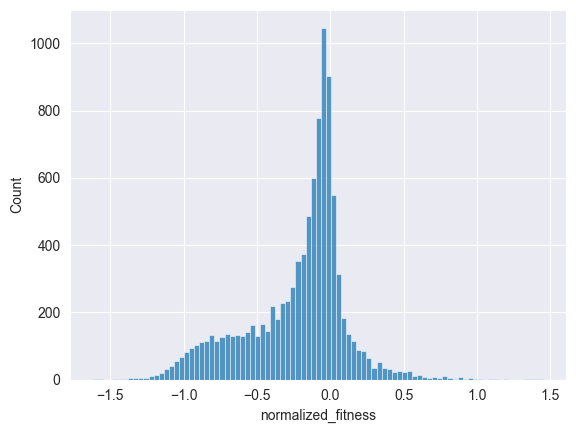

In [33]:
#Plot normalized fitness (ddG) of dataset
sns.histplot(dataFiltered,x="normalized_fitness")

In [34]:
#Grouping Dataset and calculating mean of all existing mutations

groupedData = dataFiltered.groupby('mutation')['normalized_fitness'].mean().reset_index()

groupedData['wt_aa'] = groupedData['mutation'].str[0]
groupedData['mut_aa'] = groupedData['mutation'].str[1]
print(groupedData)

    mutation  normalized_fitness wt_aa mut_aa
0         AC           -0.090008     A      C
1         AD           -0.063210     A      D
2         AE            0.016418     A      E
3         AF           -0.225112     A      F
4         AG           -0.154172     A      G
..       ...                 ...   ...    ...
375       YR           -0.228736     Y      R
376       YS           -0.075526     Y      S
377       YT           -0.096716     Y      T
378       YV           -0.225911     Y      V
379       YW           -0.223544     Y      W

[380 rows x 4 columns]


<Axes: xlabel='normalized_fitness', ylabel='Count'>

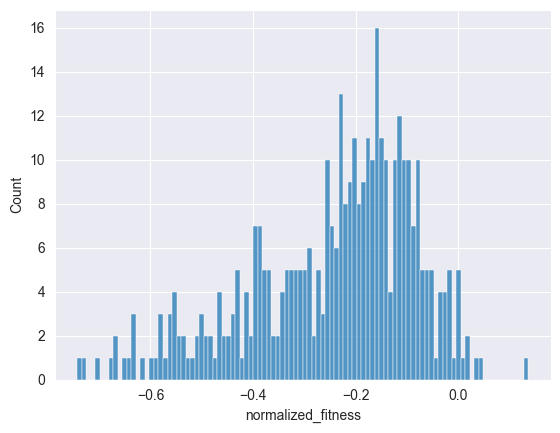

In [35]:
#avg. normalized fitness over the dataset
sns.histplot(groupedData, x="normalized_fitness", bins= 100)

,position_abs,mut_aa,normalized_fitness
0,0.0,C,0.009770
1,0.0,D,0.061171
2,0.0,E,0.199992
3,0.0,F,-0.165703
4,0.0,G,0.009916
...,...,...,...
1632,81.0,S,-0.089874
1633,81.0,T,-0.023497
1634,81.0,V,-0.188192
1635,81.0,W,-0.184240


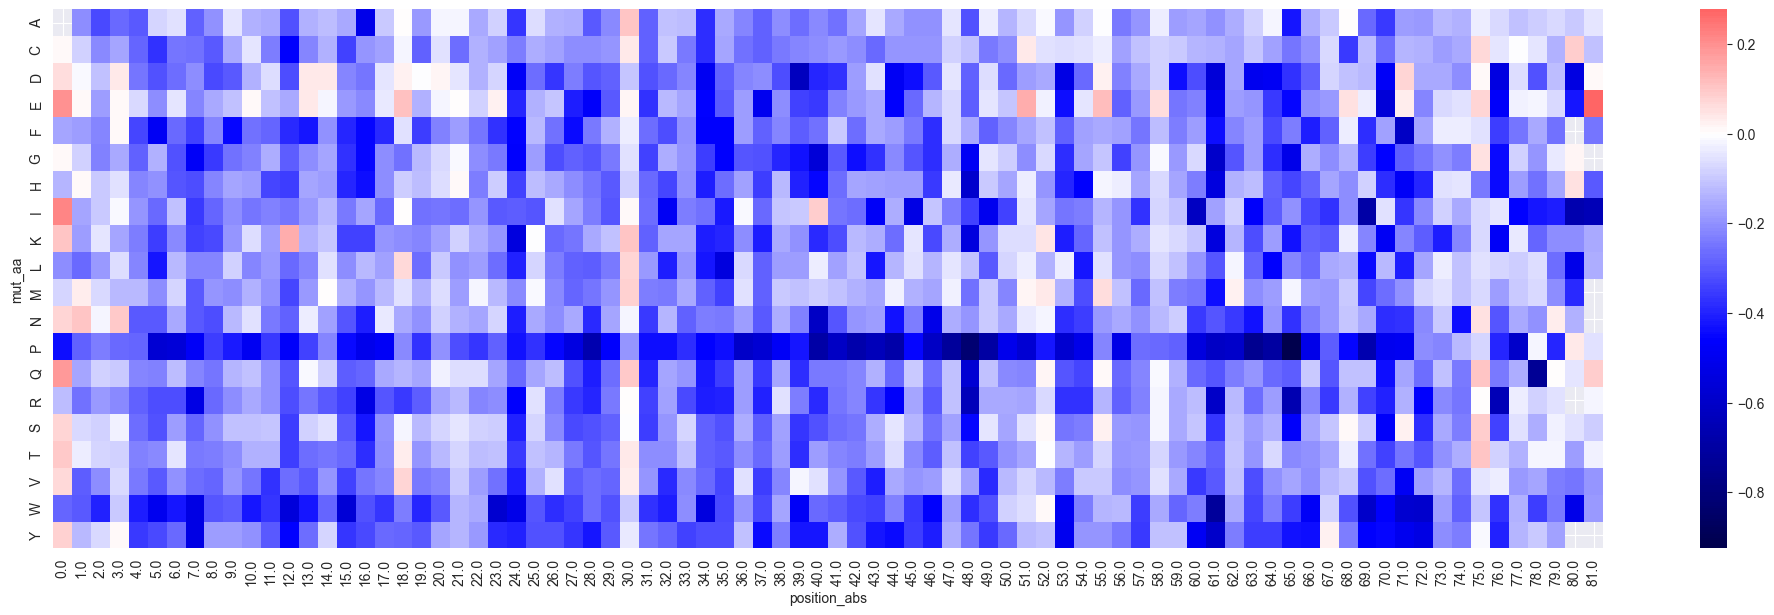

In [55]:
#avg. ddD der mutation per position 
#dataFiltered
groupedPosition=dataFiltered.groupby(["position_abs", "mut_aa"])["normalized_fitness"].mean().reset_index()
pivot_table = groupedPosition.pivot(index='mut_aa', columns='position_abs', values='normalized_fitness')
pivot_table
plt.figure(figsize= (25,7))
sns.heatmap(pivot_table, cbar=True, center=0, cmap="seismic" )
groupedPosition

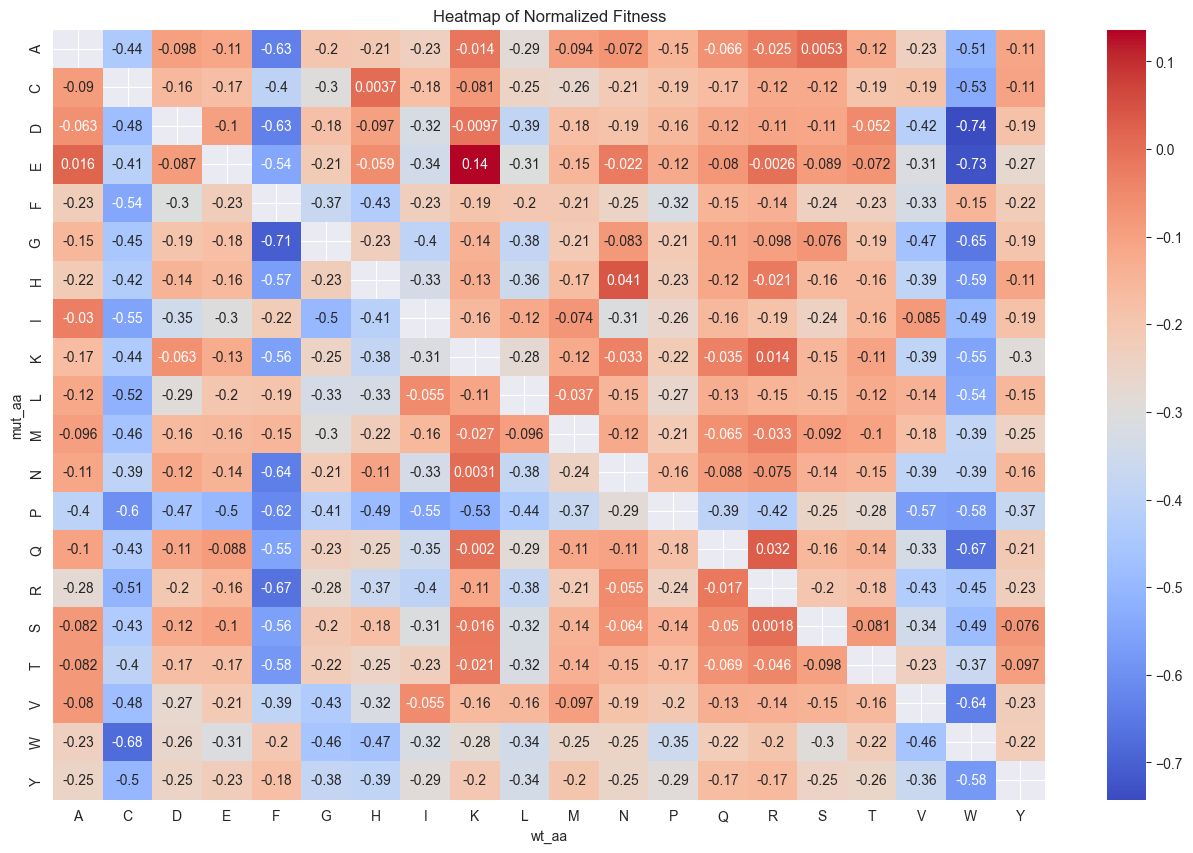

In [37]:
pivot_df = groupedData.pivot(index='mut_aa', columns='wt_aa', values='normalized_fitness')

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm')
plt.title('Heatmap of Normalized Fitness')
plt.xlabel('wt_aa')
plt.ylabel('mut_aa')
#plt.savefig('heatmap_normalized_fitness.png', format='png')
plt.show()

In [38]:
pivot_df

wt_aa,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
mut_aa,,,,,,,,,,,,,,,,,,,,
A,NaN,-0.437363,-0.097805,-0.114138,-0.634098,-0.198718,-0.206104,-0.233177,-0.013847,-0.287497,-0.094118,-0.071699,-0.145421,-0.066337,-0.025276,0.005343,-0.119654,-0.234400,-0.508581,-0.109527
C,-0.090008,NaN,-0.161058,-0.173642,-0.398248,-0.299376,0.003713,-0.178664,-0.080754,-0.249446,-0.264074,-0.212667,-0.188618,-0.169199,-0.122553,-0.122369,-0.189931,-0.188319,-0.533275,-0.105765
D,-0.063210,-0.479784,NaN,-0.099827,-0.632896,-0.181261,-0.097460,-0.324539,-0.009738,-0.386213,-0.178496,-0.187753,-0.160383,-0.119653,-0.109888,-0.112990,-0.051647,-0.415097,-0.742590,-0.185355
E,0.016418,-0.410377,-0.087495,NaN,-0.543812,-0.214843,-0.058843,-0.342493,0.136212,-0.305988,-0.150081,-0.022205,-0.119382,-0.079976,-0.002555,-0.088974,-0.071580,-0.311800,-0.728280,-0.271158
F,-0.225112,-0.543585,-0.303990,-0.225940,NaN,-0.370820,-0.430022,-0.227684,-0.189956,-0.203303,-0.205994,-0.250951,-0.316340,-0.148543,-0.136425,-0.237651,-0.233953,-0.330197,-0.149013,-0.220577
G,-0.154172,-0.448283,-0.190564,-0.176546,-0.705676,NaN,-0.227992,-0.395724,-0.138985,-0.379142,-0.212268,-0.082750,-0.211297,-0.112465,-0.097948,-0.075801,-0.188490,-0.467356,-0.650619,-0.191133
H,-0.217140,-0.423388,-0.143016,-0.163266,-0.566574,-0.226216,NaN,-0.331320,-0.130186,-0.356057,-0.172043,0.040694,-0.226139,-0.115208,-0.021378,-0.163240,-0.163624,-0.392206,-0.585603,-0.110854
I,-0.029770,-0.553363,-0.346840,-0.299875,-0.220725,-0.497447,-0.411094,NaN,-0.160695,-0.118021,-0.074151,-0.306834,-0.259090,-0.162175,-0.188223,-0.242631,-0.156767,-0.085293,-0.486481,-0.185288
K,-0.168973,-0.435977,-0.063062,-0.126877,-0.562235,-0.250461,-0.379690,-0.312828,NaN,-0.278742,-0.122994,-0.033405,-0.216275,-0.035273,0.013580,-0.149358,-0.105783,-0.391063,-0.552011,-0.295299


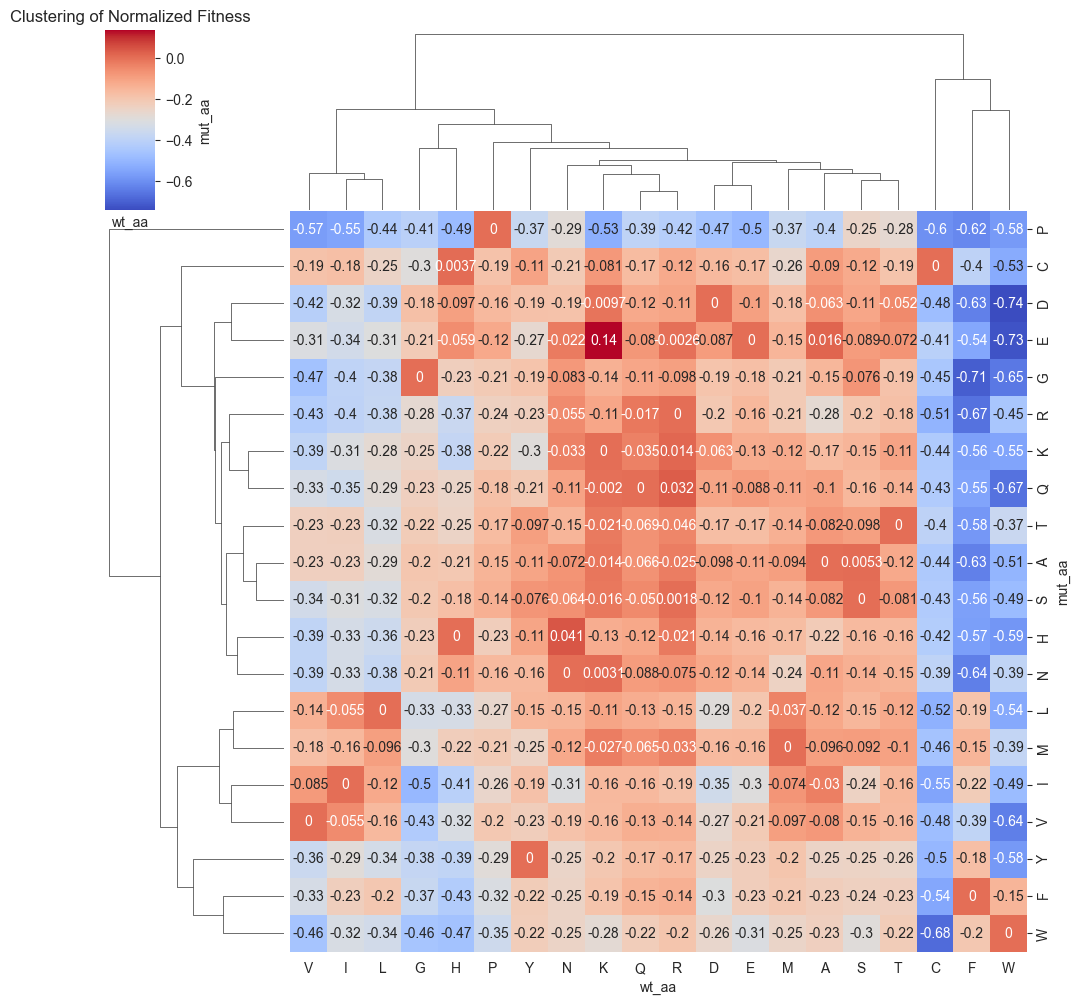

In [39]:
pivot_df_filled = pivot_df.fillna(0)
sns.clustermap(pivot_df_filled, annot=True, cmap='coolwarm')
plt.title('Clustering of Normalized Fitness')
plt.xlabel('wt_aa')
plt.ylabel('mut_aa')
plt.show()